# LAB 3 - LOGISTIC REGRESSION

This lab is comprised of two main sections:

- 1. Logistic Regression with only numerical variables

- 2. Logistic Regression with numerical + categorical variables

In this lab we will use the help of statistical packages `statsmodels` and also `sklearn` for plotting and for splitting. These are two of the most complete libraries for statistical modeling in Python.

### Load the Data

In [36]:
import numpy as np
import pandas as pd

As usual, we summon `numpy` and `pandas` for dataset representation and manipulation.

In [37]:
loans = pd.read_csv("loans.csv")
loans.info()
loans.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516 entries, 0 to 9515
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   not.fully.paid  9516 non-null   int64  
 1   installment     9516 non-null   float64
 2   log.annual.inc  9516 non-null   float64
 3   fico            9516 non-null   int64  
 4   revol.bal       9516 non-null   float64
 5   inq.last.6mths  9516 non-null   int64  
 6   pub.rec         9516 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 520.5 KB


,not.fully.paid,installment,log.annual.inc,fico,revol.bal,inq.last.6mths,pub.rec
0,0,829.10,4.929419,737,28.854,0,0
1,0,228.22,4.812913,707,33.623,0,0
2,0,366.86,4.505150,682,3.511,1,0
3,0,162.34,4.929419,712,33.667,1,0
4,0,102.92,4.907411,667,4.740,0,0


## 1. LOGISTIC REGRESSION (ONLY NUMERICAL VARIABLES)

### Renaming Columns

In Python, names with underscores. dots in R vs Python. names

In [38]:
new_column_names = {'not.fully.paid':'not_fully_paid', 'log.annual.inc':'log_annual_inc',
                   'revol.bal':'revol_bal', 'inq.last.6mths':'inq_last_6mths', 'pub.rec':'pub_rec'}
loans.rename(columns = new_column_names, inplace = True)

print(loans.columns)

Index(['not_fully_paid', 'installment', 'log_annual_inc', 'fico', 'revol_bal',
       'inq_last_6mths', 'pub_rec'],
      dtype='object')


### Splitting the Data

In previous labs we saw how to split the dataset according to conditions predicated on variable's values. We now wish to split the dataset using randomized methods.

In order to perform the splitting, we import a package from `sklearn`. We also set a fixed random state in order to exactly replicate the results at each execution of the code.

In [39]:
from sklearn.model_selection import train_test_split

loans_train, loans_test = train_test_split(loans, test_size=0.3, random_state=88)
loans_train.shape, loans_test.shape

((6661, 7), (2855, 7))

`test_size = 0.3` means that we will put 30% of the data in the test set, 70% in the training set.

In [40]:
# How many loans have defaulted?

default_false = np.sum(loans_train['not_fully_paid'] == 0)
default_true = np.sum(loans_train['not_fully_paid'] == 1)

print(pd.Series({'0': default_false, '1': default_true}))

0    5585
1    1076
dtype: int64


In [41]:
# ?ggscatmat
# ggscatmat(loans.train, alpha = 0.8)

A baseline model can be a so-called "dummy" model, where the classifier predicts every new observation as the majority class. In our case, for a datapoint with any given features, the baseline model will predict 'no-default' always.

In [42]:
# Accuracy of baseline model based on training data:

ACC = default_false/(default_false + default_true)
ACC

0.8384626932892959

In [43]:
# EXERCISE: Compute accuracy of baseline on testing:



In [44]:
# EXERCISE: What are the TPR and FPR rates of the baseline model?



### Fitting the Logistic Regression Model

Now we can use the statsmodels package to fit the training set to a logistic regression model

In [45]:
import statsmodels.formula.api as smf

?smf.logit

In [46]:
# Fit the logistic regression model

logreg = smf.logit(formula = 'not_fully_paid ~ installment + log_annual_inc + fico + revol_bal + inq_last_6mths + pub_rec',
                   data = loans_train).fit()

print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.422149
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         not_fully_paid   No. Observations:                 6661
Model:                          Logit   Df Residuals:                     6654
Method:                           MLE   Df Model:                            6
Date:                Wed, 16 Dec 2020   Pseudo R-squ.:                 0.04537
Time:                        15:09:38   Log-Likelihood:                -2811.9
converged:                       True   LL-Null:                       -2945.6
Covariance Type:            nonrobust   LLR p-value:                 8.373e-55
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          8.5765      0.967      8.866      0.000       6.681      10.472
installment      

In [47]:
# ## ALTERNATIVE PACKAGE FOR LOGISTIC REGRESSION

# import statsmodels.api as sm
# ?sm.Logit

In [48]:
# ggscatmat(loans.train, columns = 2:5, alpha = 0.8) # any correlations?

# import seaborn as sns
# corr = loans_train.corr()
# sns.heatmap(corr, 
#             xticklabels=corr.columns.values,
#             yticklabels=corr.columns.values)

In general, consider this quote:
"Programs are meant to be read by humans, and only incidentally for computers to execute." - Donald Knuth

### Predictions

In [49]:
# Example of prediction for a new observation

new_obs = pd.DataFrame(data = {'installment' : [366], 'log_annual_inc' : [4.51], 'fico' : [682],
                               'revol_bal' : [7.53], 'inq_last_6mths' : [1], 'pub_rec' : [0]})

logreg.predict(new_obs)

0    0.209408
dtype: float64

In [50]:
y_test = loans_test['not_fully_paid']

y_prob = logreg.predict(loans_test)
y_pred = pd.Series([1 if x > 0.5 else 0 for x in y_prob], index=y_prob.index)

# y_pred is the vector of probabilities as given by your model on the test set. Values between 0 and 1.
# Remember, P(Yi = 1) = 1/(1 + e^(-(b0 + b1*x1 + b2*x2 +...)) )

### Confusion Matrix

In order to evaluate the performance of our classification model, we can make use of confusion matrix to compute a variety of useful metrics

In [51]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[2404    6]
 [ 435   10]]


In [52]:
print(cm.ravel())

[2404    6  435   10]


In [53]:
# Accuracy

(cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())

0.8455341506129597

In [54]:
# EXERCISE: What is the True Positive Rate ?


# EXERCISE: What is the False Positive rate ?




Be careful about the definitions of FPR, TPR, recall, precision, sensitivity, specificity etc:
https://en.wikipedia.org/wiki/Sensitivity_and_specificity

In [55]:
# Now, try threshold probability = 0.2

# EXERCISE: What is the Accuracy?


# EXERCISE: What is the True Positive Rate ?


# EXERCISE: What is the False Positive rate ?



## 2. LOGISTIC REGRESSION (NUMERICAL + CATEGORICAL VARIABLES)

In [56]:
churn = pd.read_csv("customerchurn.csv")
churn.info()
churn.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            7032 non-null   int64  
 1   MonthlyCharges   7032 non-null   float64
 2   SeniorCitizen    7032 non-null   int64  
 3   PaymentMethod    7032 non-null   object 
 4   InternetService  7032 non-null   object 
 5   tenure           7032 non-null   int64  
 6   Contract         7032 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 384.7+ KB


,Churn,MonthlyCharges,SeniorCitizen,PaymentMethod,InternetService,tenure,Contract
0,0,29.85,0,Electronic check,DSL,1,Month-to-month
1,0,56.95,0,Mailed check,DSL,34,One year
2,1,53.85,0,Mailed check,DSL,2,Month-to-month
3,0,42.30,0,Bank transfer,DSL,45,One year
4,1,70.70,0,Electronic check,Fiber optic,2,Month-to-month


In [57]:
churn_train, churn_test = train_test_split(churn, test_size=0.3, random_state=88)
churn_train.shape, churn_test.shape

((4922, 7), (2110, 7))

In [58]:
# Any issues with categorical x variables?



In [59]:
logreg2 = smf.logit(formula = 'Churn ~ MonthlyCharges + SeniorCitizen + PaymentMethod + InternetService + tenure + Contract',
                       data = churn_train).fit()
print(logreg2.summary())

Optimization terminated successfully.
         Current function value: 0.421913
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4911
Method:                           MLE   Df Model:                           10
Date:                Wed, 16 Dec 2020   Pseudo R-squ.:                  0.2695
Time:                        15:09:39   Log-Likelihood:                -2076.7
converged:                       True   LL-Null:                       -2842.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.8982      0.213     -4

In [60]:
# EXERCISE: Now take the estimate for SeniorCitizen and transform it into an intuition of how much p will increase



In [61]:
# Let's remove MonthlyCharges
logreg3 = smf.logit(formula = 'Churn ~ SeniorCitizen + PaymentMethod + InternetService + tenure + Contract',
                       data = churn_train).fit()
print(logreg3.summary())

Optimization terminated successfully.
         Current function value: 0.422264
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4912
Method:                           MLE   Df Model:                            9
Date:                Wed, 16 Dec 2020   Pseudo R-squ.:                  0.2688
Time:                        15:09:39   Log-Likelihood:                -2078.4
converged:                       True   LL-Null:                       -2842.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.5748      0.122     -4

In [62]:
# Let's remove PaymentMethod Credit Card and PaymentMethodMailed check. How do we do this? Create a new feature. 

churn_train2 = churn_train.copy() 
churn_train2['ElectronicCheck'] = (churn_train2['PaymentMethod'] == 'Electronic check').astype('int64')
churn_train2.drop(columns=['PaymentMethod'], inplace=True)

# Let's do the same for test set as well

churn_test2 = churn_test.copy() 
churn_test2['ElectronicCheck'] = (churn_test2['PaymentMethod'] == 'Electronic check').astype('int64')
churn_test2.drop(columns=['PaymentMethod'], inplace=True)

churn_test2.head()

,Churn,MonthlyCharges,SeniorCitizen,InternetService,tenure,Contract,ElectronicCheck
2839,1,99.60,1,Fiber optic,4,Month-to-month,1
4965,0,93.80,1,Fiber optic,13,Month-to-month,0
6686,0,96.55,0,Fiber optic,5,Month-to-month,1
4151,0,25.20,0,No,39,Two year,0
241,0,109.20,0,Fiber optic,72,Two year,0


In [63]:
logreg4 = smf.logit(formula = 'Churn ~ SeniorCitizen + ElectronicCheck + InternetService + tenure + Contract',
                       data = churn_train2).fit()
print(logreg4.summary())

Optimization terminated successfully.
         Current function value: 0.422336
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4914
Method:                           MLE   Df Model:                            7
Date:                Wed, 16 Dec 2020   Pseudo R-squ.:                  0.2687
Time:                        15:09:39   Log-Likelihood:                -2078.7
converged:                       True   LL-Null:                       -2842.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -0.6254      0.085     -7.363     

In [69]:
# Confusion matrices based on decision tree threshold 
# Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of decisions (as returned by “decision_function” on some classifiers).

y_test = churn_test2['Churn']
y_prob = logreg4.predict(churn_test2)
y_pred = pd.Series([1 if x > 1/3 else 0 for x in y_prob], index=y_prob.index)

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[1213  329]
 [ 154  414]]


### ROC Curves

In [65]:
y_train = churn_train2['Churn']
X_train = churn_train2.drop(['Churn'], axis=1)

y_test = churn_test2['Churn']
X_test = churn_test2.drop(['Churn'], axis=1)

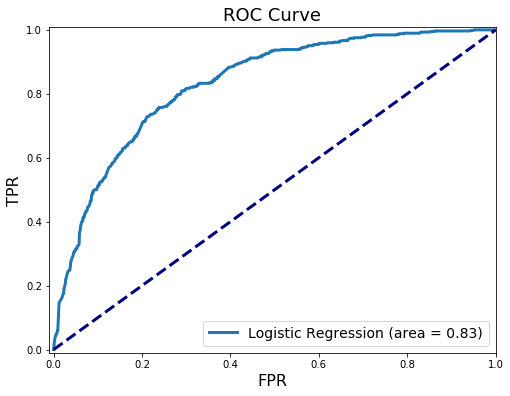

In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.legend(loc='lower right', fontsize=14)
plt.show()

# ------------------------------------------------------------------------------------------

## Linear Discriminant Analysis

In [67]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# lda = LinearDiscriminantAnalysis()
# lda.fit(X_train, y_train)

# y_prob = lda.predict_proba(X_test)
# y_pred = pd.Series([1 if x > 1/3 else 0 for x in y_prob[:,1]], index=y_test.index)

# cm = confusion_matrix(y_test, y_pred)
# print ("Confusion Matrix: \n", cm)
# print ("\nAccuracy:", accuracy_score(y_test, y_pred))

In [68]:
# fpr_lda, tpr_lda, _ = roc_curve(y_test, y_prob_lda)
# roc_auc_lda = auc(fpr_lda, tpr_lda)

# plt.figure(figsize=(8, 6))
# plt.title('ROC Curve', fontsize=18)
# plt.xlabel('FPR', fontsize=16)
# plt.ylabel('TPR', fontsize=16)
# plt.xlim([-0.01, 1.00])
# plt.ylim([-0.01, 1.01])
# plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
# plt.plot(fpr_lda, tpr_lda, lw=3, label='LDA (area = {:0.2f})'.format(roc_auc_lda))
# plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
# plt.legend(loc='lower right', fontsize=14)
# plt.show()